In [1]:
# Importing the required libraries

import requests
import bs4 as bs
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import plotly.express as px

In [2]:
# Code block to check whether the URL has a good or a bad request and collect the response accordingly
url="https://simple.wikipedia.org/wiki/List_of_countries_by_continents"
request=requests.get(url)
if request.status_code==200:
    print("url has good request with request code",request.status_code)
    response=request.text
    soup=bs.BeautifulSoup(response,'html.parser')
else:
    print("url has a bad request",request.status_code)

url has good request with request code 200


In [3]:
# Collecting the continents in a list using tags and classes
continents=[]
number_of_continents=0
for spans in soup.find_all('span',attrs={'class':'mw-headline'}):
    if number_of_continents==7:
        break
    continents.append(spans.text)
    number_of_continents=number_of_continents+1

In [4]:
# Collecting the countries in a list using tags and classes

keys = continents
countries_per_continent={key: [] for key in keys}

for i in range(len(continents)):
    
    # Finding the first continent in the web page and its sibling
    span=soup.find('span',string=continents[i],attrs={'class':'mw-headline'})
    tag=span.find_next('p').findNextSibling()
    
    # condition to check if there is no list or li tag as in the case of Antarctica
    if (tag.find_all('li')==[]) and (i<(len(continents)-1)) and (tag.find_next().text==continents[i+1]):
        countries_per_continent[continents[i]].append('NAN')
    
    # condition to check for Australia as there is no li tag after a p tag which is unlike other continents in the web-page 
    elif (tag.find_all('li')==[]):
        exception_cases=tag.find_next('ul')
        exception_list=exception_cases.find_all('li')
        for ex in exception_list:
            countries_per_continent[continents[i]].append(ex.text.split("-")[0].strip())
    
    # For all other continents which follow similar representation in web-page
    else:
        countries_list=(tag.find_all('li'))
        for li in countries_list:
            countries_per_continent[continents[i]].append(li.text.split("-")[0].strip())

In [5]:
# Displaying the continent and the countries it has. The last 7 list elements in australia are not scraped as they are islands and not countries

print("The countries according to their continents are as follows\n")
for i in range(len(countries_per_continent)):
    print(continents[i])
    print(countries_per_continent[continents[i]])
    print("\n")

The countries according to their continents are as follows

Africa
['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon (also spelled Cameroun)', 'Cape Verde', 'Central African Republic', 'Chad (Tchad)', 'Comoros', 'Republic of the Congo', 'Democratic Republic of the Congo (Zaire)', "Côte d'Ivoire (Ivory Coast)", 'Djibouti', 'Egypt (Misr)', 'Equatorial Guinea', 'Eritrea', 'Ethiopia (Abyssinia)', 'Gabon', 'The Gambia', 'Ghana', 'Guinea', 'Guinea', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco (Al Maghrib)', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'São Tomé and Príncipe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Swaziland (Eswatini)', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Western Sahara', 'Zambia', 'Zimbabwe']


Antarctica
['NAN']


Asia
['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh [1](বাংলাদেশ)', 'Bhutan', 'Bru

In [6]:
# Creating countries and continents dataframe with columns country and continents

df = pd.DataFrame.from_dict(countries_per_continent, orient = "index").stack().reset_index(level=1,drop=True)
dataframe=pd.DataFrame({'country':df.values, 'continent':df.index})

In [7]:
# Displaying the country and continent dataframe

dataframe

,country,continent
0,Algeria,Africa
1,Angola,Africa
2,Benin,Africa
3,Botswana,Africa
4,Burkina Faso,Africa
...,...,...
220,Samoa,Oceania/Australia
221,Solomon Islands,Oceania/Australia
222,Tonga,Oceania/Australia
223,Tuvalu,Oceania/Australia


In [8]:
# Code block to check whether the URL has a good or a bad request and collect the response accordingly

url2='https://en.wikipedia.org/wiki/World_Happiness_Report#2019_report'
request2=requests.get(url2)
if request2.status_code==200:
    print("url has good request with request code",request.status_code)
    response2=request2.text
    soup2=bs.BeautifulSoup(response2,'html.parser')
else:
    print("url has a bad request",request2.status_code)

url has good request with request code 200


In [9]:
# Collecting information from table with happiness score

table = soup2.find_all('table',attrs={'class':'wikitable sortable'})
dataframe2 = pd.read_html(str(table))[0]

In [10]:
# Displaying the dataframe with happiness scores of different countries

dataframe2

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [11]:
# Removing special characters from country names for further processing

refined_country_names=[]
for d in dataframe['country']:
    temp=d.split('(')[0].split('[')[0].split('*')
    refined_country_names.append(temp[0].strip())
    
# assigning country names with no special characters

dataframe['country']=refined_country_names

In [12]:
# Checking for country names in the two dataframes to be merged if there is any mismatch

different_country_names=[]
for names in dataframe2['Country or region']:
    temp=names in dataframe['country'].values
    
    # condition checking the names which belong to same country but are represented differently
    
    if temp==False:
        different_country_names.append(names)
        
# Manually replacing the values to dataframe whose names are represented differently
# This addition of countries is subjective to the time at which the website is scraped
# if there are changes to the webpage, then the new_values list below needs to be updated as accordingly

new_values=['Republic of Ireland','Trinidad and Tobago','Northern Cyprus','Hong Kong',"Côte d""'""Ivoire","Republic of the Congo","Palestine","The Gambia",'Democratic Republic of the Congo','Swaziland']
dataframe2.replace(to_replace=different_country_names,value=new_values,inplace=True)

In [13]:
# Merging the two dataframes to get a new dataframe

merged_dataframe=dataframe.merge(dataframe2.set_index('Country or region'),how='left', left_on='country', right_on='Country or region')

# Adding two missing rows to the dataframe as these two countries are not present in the countries web-page scraped earlier

new_country={'country':['Hong Kong','Northern Cyprus'],'continent':['Asia','Europe'],'Overall rank':[76,64],'Score':[5.430,5.718],'GDP per capita':[1.438,1.263],'Social support':[1.277,1.252],'Healthy life expectancy':[1.122,1.042],'Freedom to make life choices':[0.440,0.417],'Generosity':[0.258,0.191],'Perceptions of corruption':[0.287,0.162]}
new_dataframe=pd.DataFrame(new_country)
merged_dataframe=merged_dataframe.append(new_dataframe).reset_index()
merged_dataframe=merged_dataframe.drop_duplicates('country')

In [14]:
# Extracting dataframe for specific rows which has happiness scores for plotting and discarding other countries as the data is not available for all countries

# Sorting according to Overall rank which will help in further plotting
rows=merged_dataframe['Overall rank'].fillna(0)
countries_with_rank=[]
for i in rows:
    if i!=0:
        countries_with_rank.append(i)
countries_with_happiness_score=merged_dataframe[merged_dataframe['Overall rank'].isin(countries_with_rank)]
sorted_happiness=countries_with_happiness_score.sort_values(by=('Overall rank')).reset_index()
sorted_happiness.reset_index(drop=True, inplace=True)
sorted_happiness.set_index('Overall rank',inplace=True)

# Removing unwanted columns and dropping duplicates if any
del sorted_happiness['level_0']
del sorted_happiness['index']
sorted_happiness=sorted_happiness.drop_duplicates()

In [15]:
# Displaying Merged list with all countries
merged_dataframe

,index,country,continent,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,0,Algeria,Africa,88.0,5.211,1.002,1.160,0.785,0.086,0.073,0.114
1,1,Angola,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Benin,Africa,102.0,4.883,0.393,0.437,0.397,0.349,0.175,0.082
3,3,Botswana,Africa,148.0,3.488,1.041,1.145,0.538,0.455,0.025,0.100
4,4,Burkina Faso,Africa,115.0,4.587,0.331,1.056,0.380,0.255,0.177,0.113
...,...,...,...,...,...,...,...,...,...,...,...
222,222,Tonga,Oceania/Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,223,Tuvalu,Oceania/Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224,224,Vanuatu,Oceania/Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225,0,Hong Kong,Asia,76.0,5.430,1.438,1.277,1.122,0.440,0.258,0.287


In [16]:
# Displaying sorted happiness dataframe with respective continent 
sorted_happiness

,country,continent,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,,,,,,,,,
1.0,Finland,Europe,7.769,1.340,1.587,0.986,0.596,0.153,0.393
2.0,Denmark,Europe,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3.0,Norway,Europe,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4.0,Iceland,Europe,7.494,1.380,1.624,1.026,0.591,0.354,0.118
5.0,Netherlands,Europe,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
152.0,Rwanda,Africa,3.334,0.359,0.711,0.614,0.555,0.217,0.411
153.0,Tanzania,Africa,3.231,0.476,0.885,0.499,0.417,0.276,0.147
154.0,Afghanistan,Asia,3.203,0.350,0.517,0.361,0.000,0.158,0.025


In [17]:
# Adding the merged dataframe to a csv file.

# The below CSV file contains all the countries from first website and their respective happiness scores and other data
# There are a lot of empty values as there is no data on happiness for many countries

merged_dataframe.to_csv("output1.csv")

# The below CSV file contains countries which have a happiness score along with the continents column merged with it.
# There are no empty values as all the countries can be merged to their respective continents

sorted_happiness.to_csv("output2.csv")

Text(0, 0.5, 'Happiness Score')

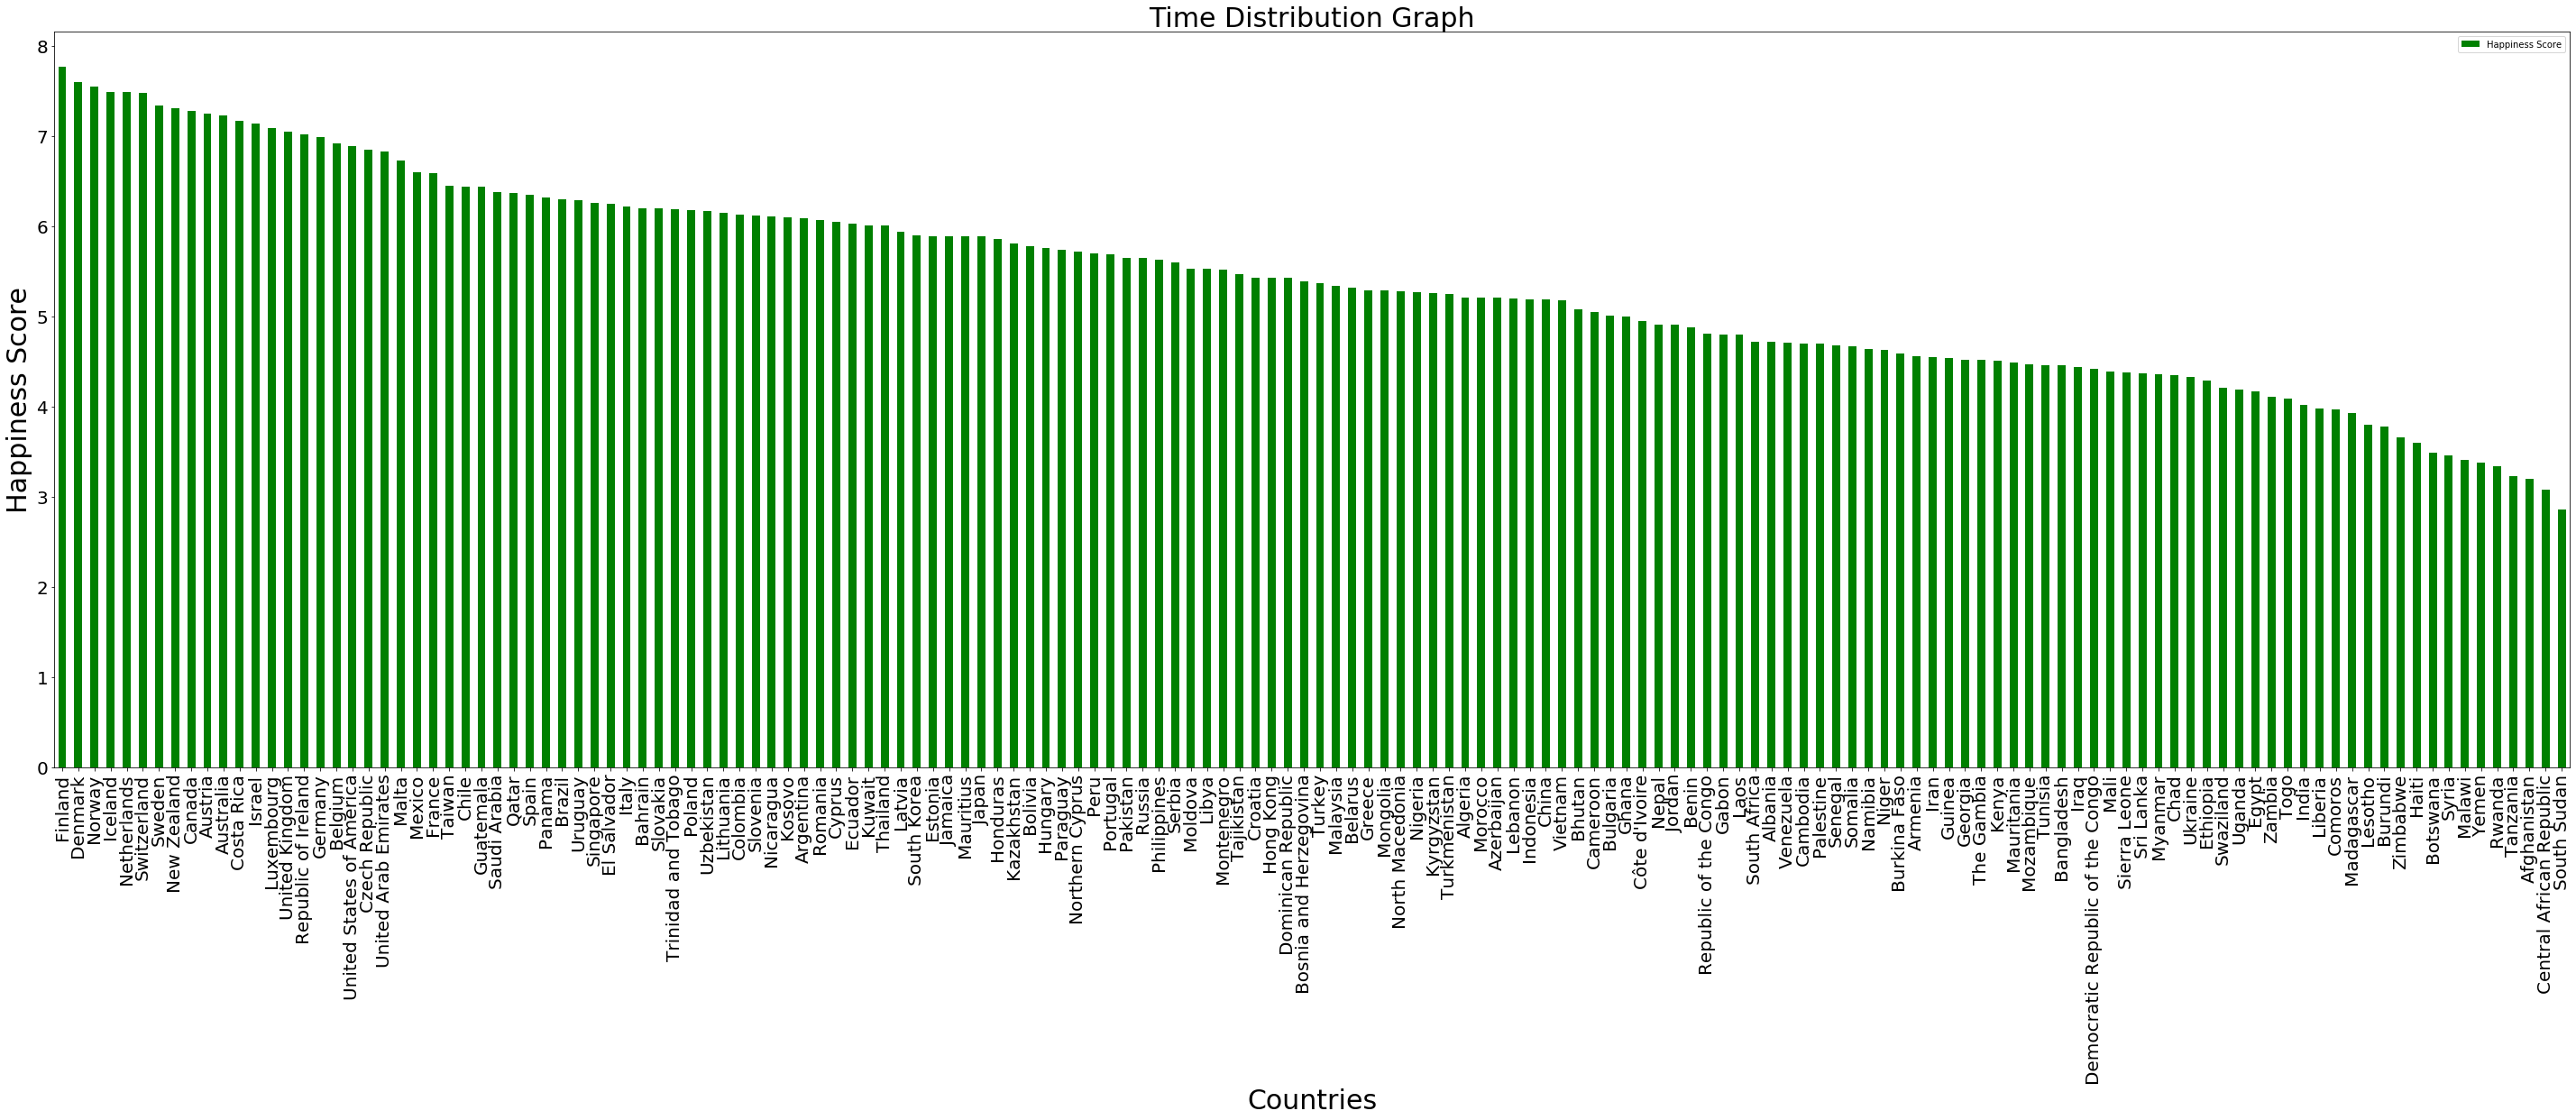

In [18]:
# Plotting the distribution for happiness score per country with the below graph properties

ax=sorted_happiness.plot(x='country',y='Score',color='green',kind='bar',figsize=(50,15),label='Happiness Score',legend=True,fontsize=20)
ax.set_title("Time Distribution Graph",fontsize=30)
ax.set_xlabel("Countries",fontsize=30)
ax.set_ylabel("Happiness Score",fontsize=30)

In [19]:
# Computing top 10 happiest countries. It is the first 10 countries as the logic to sort it has already been applied before
# sorted_happiness dataframe contains countries with highest score at the first and sorted accordingly

top_10_happiest_countries=sorted_happiness['country'][1:10]

# Displaying the top 10 countries
print(top_10_happiest_countries)

Overall rank
1.0         Finland
2.0         Denmark
3.0          Norway
4.0         Iceland
5.0     Netherlands
6.0     Switzerland
7.0          Sweden
8.0     New Zealand
9.0          Canada
10.0        Austria
Name: country, dtype: object


In [20]:
# Computing and displaying average

average_score=sorted_happiness['Score'].mean()
print("The average of happiness is")
print(average_score)

The average of happiness is
5.407032051282051


In [21]:
# Computing median for happiness scores and displaying median

median=sorted_happiness.loc[:,"Score"].median()
print("The median value for the happiness score is \n")
print(median)

The median value for the happiness score is 

5.3795


In [22]:
# Computing countries below median and displaying it

countries_below_median=sorted_happiness['country'][(sorted_happiness['Score'] < median)]
print("The countries below median are\n")
print(countries_below_median)

The countries below median are

Overall rank
79.0                       Turkey
80.0                     Malaysia
81.0                      Belarus
82.0                       Greece
83.0                     Mongolia
                   ...           
152.0                      Rwanda
153.0                    Tanzania
154.0                 Afghanistan
155.0    Central African Republic
156.0                 South Sudan
Name: country, Length: 78, dtype: object


In [23]:
# Computing correlation

correlation=sorted_happiness.corr()
print("The correlation between different variables is as follows\n")

The correlation between different variables is as follows



In [24]:
# Displaying correlation

correlation

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Score,1.000000,0.795287,0.777333,0.780018,0.566778,0.082999,0.382168
GDP per capita,0.795287,1.000000,0.757348,0.838715,0.376613,-0.070716,0.299555
Social support,0.777333,0.757348,1.000000,0.719159,0.448972,-0.038768,0.177876
Healthy life expectancy,0.780018,0.838715,0.719159,1.000000,0.390872,-0.023284,0.292454
Freedom to make life choices,0.566778,0.376613,0.448972,0.390872,1.000000,0.281704,0.430865
Generosity,0.082999,-0.070716,-0.038768,-0.023284,0.281704,1.000000,0.312020
Perceptions of corruption,0.382168,0.299555,0.177876,0.292454,0.430865,0.312020,1.000000


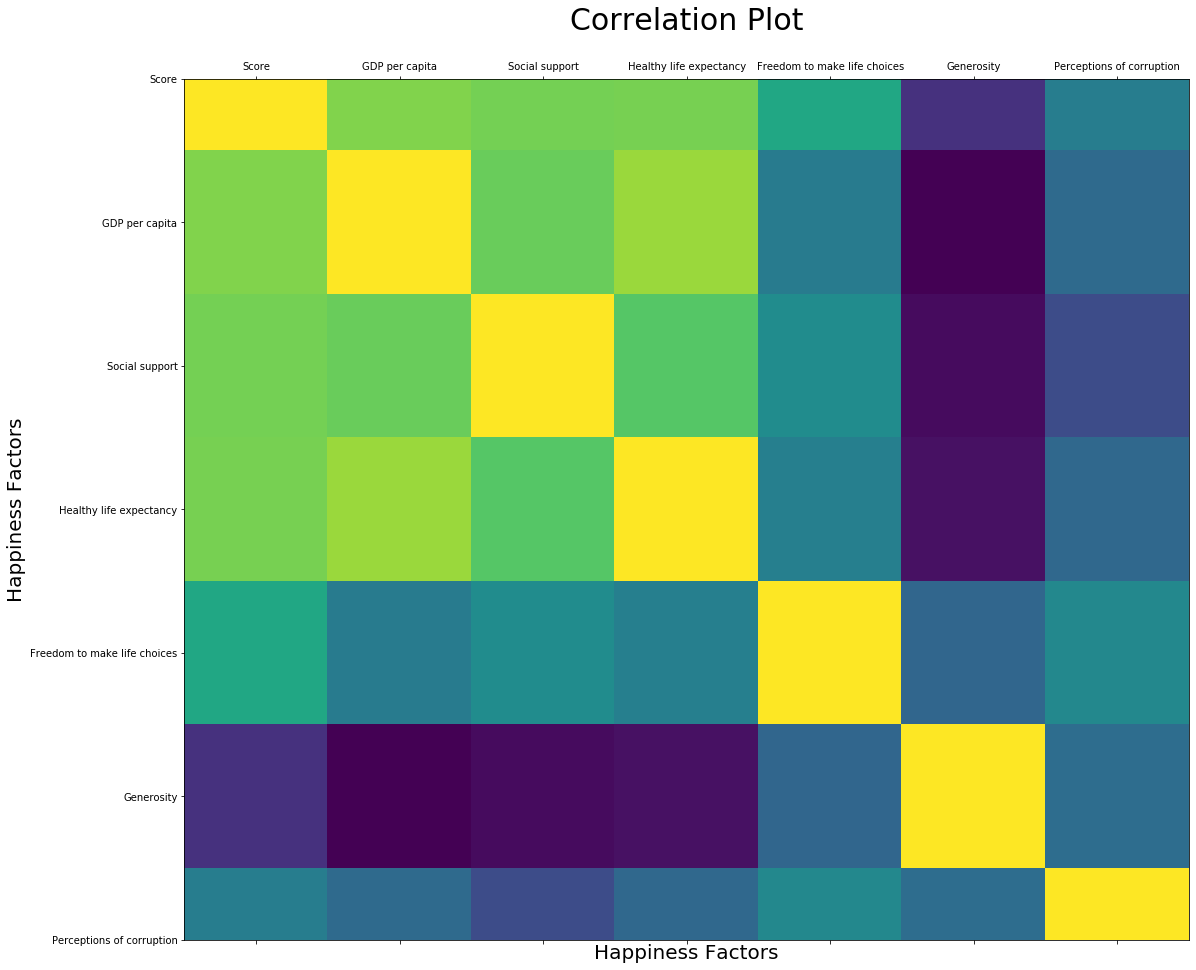

In [25]:
# Plotting the correlation plot with below graph properties

f = plt.figure(figsize=(18, 18))
plt.matshow(correlation, fignum=f.number)
columns_to_plot=['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']
plt.xticks(range(len(columns_to_plot)),columns_to_plot,fontsize=10)
plt.yticks(range(len(columns_to_plot)),columns_to_plot,fontsize=10)
plt.xlabel("Happiness Factors",fontsize=20)
plt.ylabel("Happiness Factors",fontsize=20)
plt.title("Correlation Plot",fontsize=30)
plt.show()

In [26]:
correlation.style.background_gradient(cmap='coolwarm', axis=None)

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Score,1,0.795287,0.777333,0.780018,0.566778,0.0829994,0.382168
GDP per capita,0.795287,1,0.757348,0.838715,0.376613,-0.0707155,0.299555
Social support,0.777333,0.757348,1,0.719159,0.448972,-0.0387679,0.177876
Healthy life expectancy,0.780018,0.838715,0.719159,1,0.390872,-0.0232838,0.292454
Freedom to make life choices,0.566778,0.376613,0.448972,0.390872,1,0.281704,0.430865
Generosity,0.0829994,-0.0707155,-0.0387679,-0.0232838,0.281704,1,0.31202
Perceptions of corruption,0.382168,0.299555,0.177876,0.292454,0.430865,0.31202,1


# The interpretaion can be dones as folllows:
# Two values are strongly correlated or have a stronger correlation if value is approaching 1 or -1 or is close to it. For example GDP per capita and Healthy life expectancy have a high correlation
# Also the negative sign in some values indiacate direction meaning if value of one variable increases the other decreases. For example if Social support increases, then generosity decreases.

In [27]:
# Computing the happiest country for each continent

print("The happiest country in each continent is as follows\n")
sorted_happiness.loc[sorted_happiness.groupby(["continent"],sort=False)["Score"].idxmax()]

The happiest country in each continent is as follows



,country,continent,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,,,,,,,,,
1.0,Finland,Europe,7.769,1.340,1.587,0.986,0.596,0.153,0.393
8.0,New Zealand,Oceania/Australia,7.307,1.303,1.557,1.026,0.585,0.330,0.380
9.0,Canada,North America,7.278,1.365,1.505,1.039,0.584,0.285,0.308
13.0,Israel,Asia,7.139,1.276,1.455,1.029,0.371,0.261,0.082
26.0,Chile,South America,6.444,1.159,1.369,0.920,0.357,0.187,0.056
57.0,Mauritius,Africa,5.888,1.120,1.402,0.798,0.498,0.215,0.060


In [28]:
# Code block to check whether the URL has a good or a bad request and collect the response accordingly

url3='https://en.wikipedia.org/wiki/ISO_3166-1#Current_codes'
request3=requests.get(url3)
if request3.status_code==200:
    print("url has good request with request code",request.status_code)
    response3=request3.text
    soup3=bs.BeautifulSoup(response3,'html.parser')
else:
    print("url has a bad request",request3.status_code)

url has good request with request code 200


In [29]:
# Collecting information from table with happiness score

table = soup3.find_all('table',attrs={'class':'wikitable sortable'})
dataframe3 = pd.read_html(str(table))[1]

In [30]:
# Dispaying the scraped table

dataframe3

,English short name (using title case),Alpha-2 code,Alpha-3 code,Numeric code,Link to ISO 3166-2 subdivision codes,Independent
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Yes
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,No
2,Albania,AL,ALB,8,ISO 3166-2:AL,Yes
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Yes
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,No
...,...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF,No
245,Western Sahara,EH,ESH,732,ISO 3166-2:EH,No
246,Yemen,YE,YEM,887,ISO 3166-2:YE,Yes
247,Zambia,ZM,ZMB,894,ISO 3166-2:ZM,Yes


In [31]:
# The country with its 3 alpha code is extracted
alpha_code = dataframe3[['English short name (using title case)','Alpha-3 code']]

In [32]:
# Displaying the country with its 3 alpha code
alpha_code

,English short name (using title case),Alpha-3 code
0,Afghanistan,AFG
1,Åland Islands,ALA
2,Albania,ALB
3,Algeria,DZA
4,American Samoa,ASM
...,...,...
244,Wallis and Futuna,WLF
245,Western Sahara,ESH
246,Yemen,YEM
247,Zambia,ZMB
